In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [2]:
# Load your data 
data = pd.read_csv(r'C:\Users\Sooraj\Downloads\Company_Data.csv')

# Display the first few rows of the dataset
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


C:\Users\Sooraj\AppData\Local\Temp\ipykernel_16248\1939813544.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

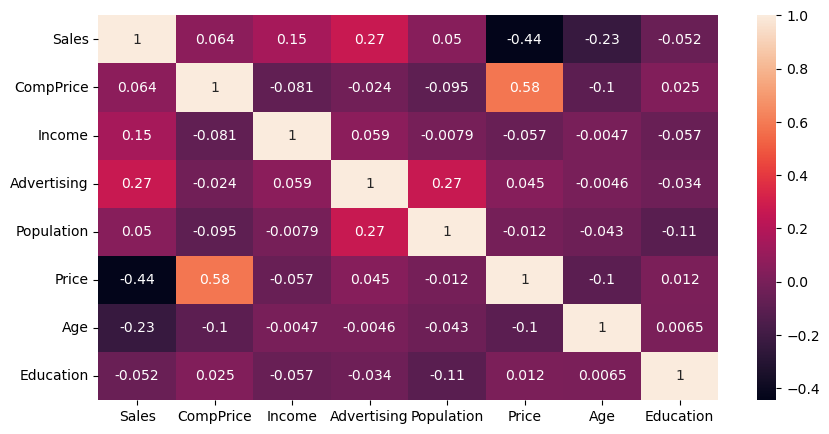

In [5]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [6]:
# Split the data into features (X) and target variable (y)
X = data.drop('Sales', axis=1)  # Assuming 'Sales' is your target variable
y = pd.qcut(data['Sales'], q=[0, 0.3, 0.7, 1], labels=['Low Sales', 'Medium Sales', 'High Sales'])

In [7]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [8]:
# Define categorical columns
categorical_cols = ['ShelveLoc', 'Urban', 'US']

In [9]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ])

In [10]:
# Create a pipeline with the preprocessor and the Random Forest classifier
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Fit the model to the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [13]:
# Make predictions on the test set
y_pred = pipeline.predict(X_test)

In [14]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.575


In [15]:
# Display classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

  High Sales       0.86      0.64      0.73        28
   Low Sales       0.45      0.48      0.47        21
Medium Sales       0.49      0.58      0.53        31

    accuracy                           0.57        80
   macro avg       0.60      0.57      0.58        80
weighted avg       0.61      0.57      0.58        80



<Axes: title={'center': 'Confusion matrix'}>

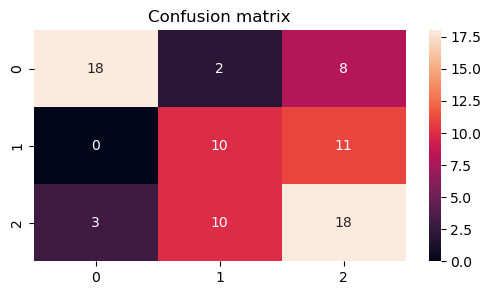

In [16]:
plt.figure(figsize=(6, 3))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

# Bagging

In [17]:
# Create a BaggingClassifier with a base RandomForestClassifier
bagging_classifier = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=42)

In [18]:
# Create and fit the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', bagging_classifier)
])

pipeline.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('classifier',
                 BaggingClassifier(base_estimator=RandomForestClassifier(),
                                   random_state=42))])

In [19]:
# Make predictions on the test set
y_pred_bagg = pipeline.predict(X_test)

In [20]:
# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.57


In [21]:
# Display classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred_bagg))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_bagg))


Classification Report:
              precision    recall  f1-score   support

  High Sales       0.84      0.57      0.68        28
   Low Sales       0.45      0.48      0.47        21
Medium Sales       0.46      0.58      0.51        31

    accuracy                           0.55        80
   macro avg       0.59      0.54      0.55        80
weighted avg       0.59      0.55      0.56        80

Confusion Matrix:
[[16  2 10]
 [ 0 10 11]
 [ 3 10 18]]


# Boosting

In [22]:
# Create a base classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

In [23]:
# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)

In [24]:
# Create and fit the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', adaboost_classifier)
])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('classifier',
                 AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                                    random_state=42))])

# Train the AdaBoost classifier
adaboost_classifier.fit(X_train, y_train)

In [25]:
# Make predictions
y_pred_adaboost = pipeline.predict(X_test)

In [26]:
# Evaluate the AdaBoost classifier
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print('AdaBoost Classifier Accuracy:', accuracy_adaboost)

AdaBoost Classifier Accuracy: 0.5875


In [27]:
# Display classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred_adaboost))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_adaboost))

Classification Report:
              precision    recall  f1-score   support

  High Sales       0.86      0.64      0.73        28
   Low Sales       0.47      0.43      0.45        21
Medium Sales       0.50      0.65      0.56        31

    accuracy                           0.59        80
   macro avg       0.61      0.57      0.58        80
weighted avg       0.62      0.59      0.59        80

Confusion Matrix:
[[18  2  8]
 [ 0  9 12]
 [ 3  8 20]]


# Stacking

In [28]:
# Create base classifiers
base_classifier_bagging = DecisionTreeClassifier()
base_classifier_boosting = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=42)
base_classifier_stacking = LogisticRegression()

In [29]:
# Create stacking classifier
estimators = [('bagging', base_classifier_bagging), ('boosting', base_classifier_boosting)]
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=base_classifier_stacking)

In [30]:
# Create and fit the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', stacking_classifier)
])

pipeline.fit(X_train, y_train)

C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-p

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['ShelveLoc', 'Urban',
                                                   'US'])])),
                ('classifier',
                 StackingClassifier(estimators=[('bagging',
                                                 DecisionTreeClassifier()),
                                                ('boosting',
                                                 AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                                                                    random_state=42))],
                                    final_estimator=LogisticRegression()))])

In [31]:
# Make predictions
y_pred_stacking = pipeline.predict(X_test)

In [32]:
# Evaluate the Stacking classifier
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print('Stacking Classifier Accuracy:', accuracy_stacking)

Stacking Classifier Accuracy: 0.5875


In [33]:
# Display classification report and confusion matrix
print('Classification Report:')
print(classification_report(y_test, y_pred_stacking))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_stacking))

Classification Report:
              precision    recall  f1-score   support

  High Sales       0.86      0.64      0.73        28
   Low Sales       0.47      0.43      0.45        21
Medium Sales       0.50      0.65      0.56        31

    accuracy                           0.59        80
   macro avg       0.61      0.57      0.58        80
weighted avg       0.62      0.59      0.59        80

Confusion Matrix:
[[18  2  8]
 [ 0  9 12]
 [ 3  8 20]]
